# Tugas Praktikum JS4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/ML/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


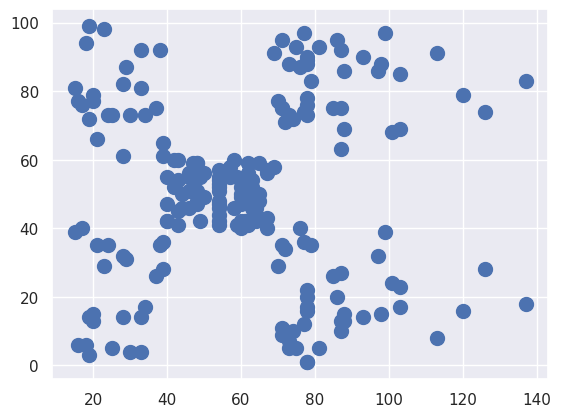

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

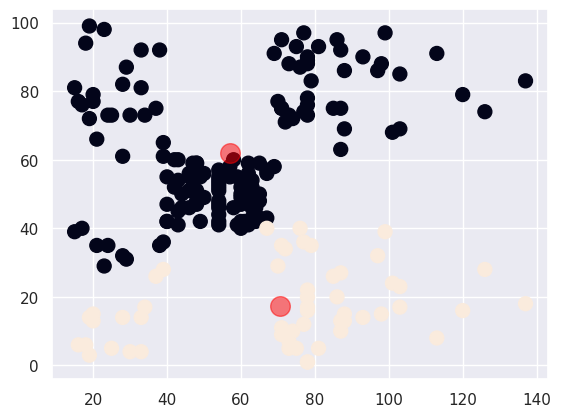

In [ ]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 184609.98434090626


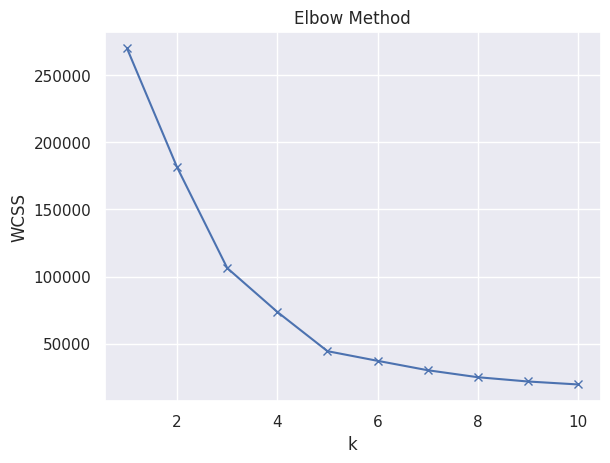

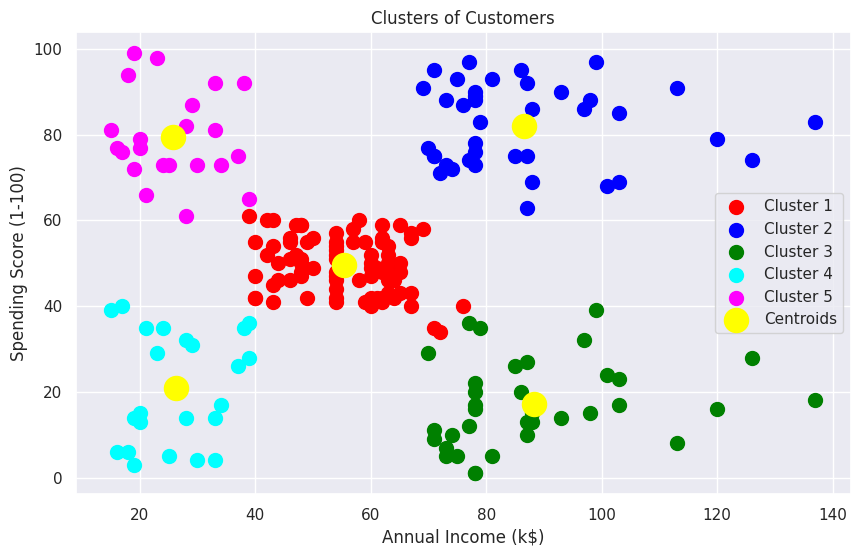

In [ ]:
# --- Find the best K using the Elbow Method ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss,  "bx-")
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()
print()
plt.close()

# --- Build K-Means model with the best K (K=5) ---
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# --- Visualize the clusters ---
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
plt.close()

**Tugas DBScan**

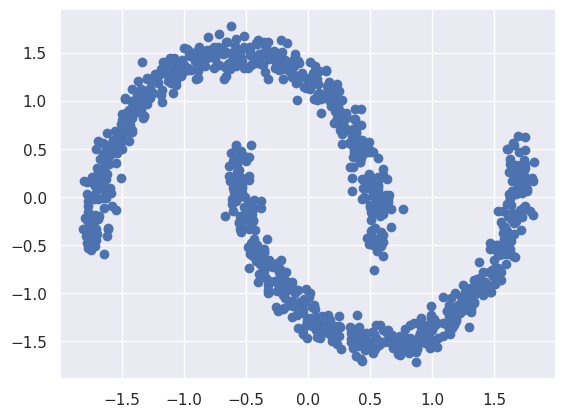

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, labels_true = make_moons(
    n_samples=1000, noise=0.05, random_state=0
)

X = StandardScaler().fit_transform(X)

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)

def cluster_noise_count(db, eps, min_samples):
  labels = db.labels_

  unique_labels = set(labels)

  # Number of clusters in labels, ignoring noise if present.
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  print(f"Cluster & Noise on eps={eps} min_samples={min_samples}")
  print("-------------------------------------")
  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  print("-------------------------------------\n")

cluster_noise_count(db, 0.2, 5)


Cluster & Noise on eps=0.2 min_samples=5
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------



In [ ]:
from sklearn import metrics

def metrics_evaluation(db, eps, min_samples):
  labels = db.labels_

  print(f"Metrics Evaluation on eps={eps} min_samples={min_samples}")
  print("-------------------------------------")
  print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
  print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
  print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
  print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
  print(
      "Adjusted Mutual Information:"
      f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
  )
  print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
  print("-------------------------------------\n")

metrics_evaluation(db, 0.2, 5)

Metrics Evaluation on eps=0.2 min_samples=5
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



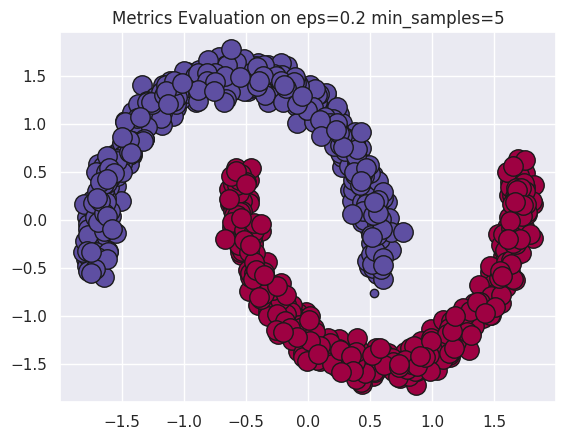

In [ ]:
def dbscan_visualization(db, eps, min_samples):
  labels = db.labels_

  unique_labels = set(labels)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True

  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
      if k == -1:
          # Black used for noise.
          col = [0, 0, 0, 1]

      class_member_mask = labels == k

      xy = X[class_member_mask & core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=14,
      )

      xy = X[class_member_mask & ~core_samples_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )
  plt.title(f"Metrics Evaluation on eps={eps} min_samples={min_samples}")

  plt.show()
  print("\n")
  plt.close()

dbscan_visualization(db, 0.2, 5)

Cluster & Noise on eps=0.05 min_samples=3
-------------------------------------
Estimated number of clusters: 67
Estimated number of noise points: 197
-------------------------------------

Metrics Evaluation on eps=0.05 min_samples=3
-------------------------------------
Homogeneity: 0.804
Completeness: 0.155
V-measure: 0.260
Adjusted Rand Index: 0.033
Adjusted Mutual Information: 0.246
Silhouette Coefficient: 0.078
-------------------------------------



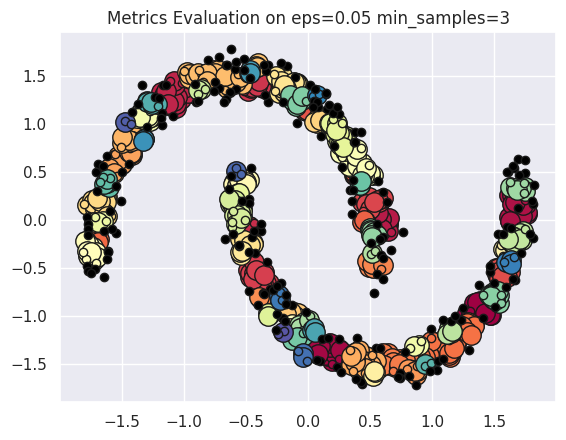



Cluster & Noise on eps=0.05 min_samples=10
-------------------------------------
Estimated number of clusters: 0
Estimated number of noise points: 1000
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



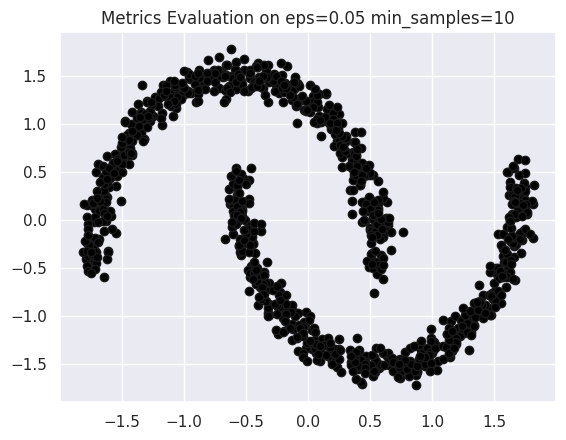



Cluster & Noise on eps=0.05 min_samples=20
-------------------------------------
Estimated number of clusters: 0
Estimated number of noise points: 1000
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



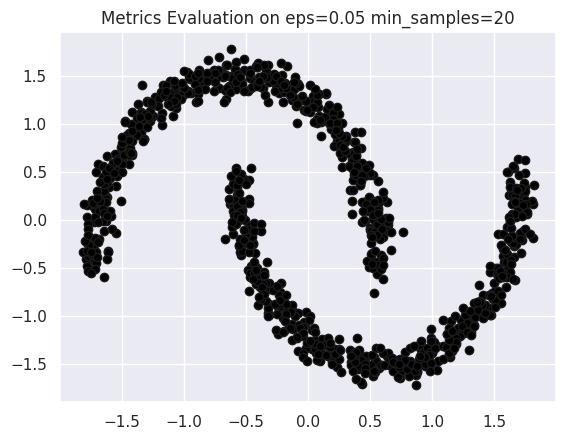



Cluster & Noise on eps=0.1 min_samples=3
-------------------------------------
Estimated number of clusters: 3
Estimated number of noise points: 18
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=3
-------------------------------------
Homogeneity: 0.983
Completeness: 0.708
V-measure: 0.824
Adjusted Rand Index: 0.854
Adjusted Mutual Information: 0.823
Silhouette Coefficient: 0.138
-------------------------------------



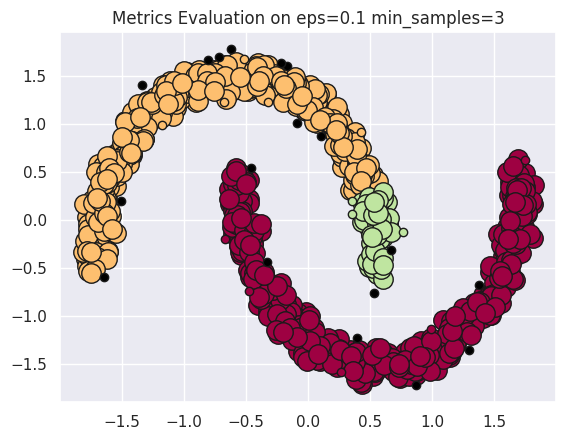



Cluster & Noise on eps=0.1 min_samples=10
-------------------------------------
Estimated number of clusters: 9
Estimated number of noise points: 63
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=10
-------------------------------------
Homogeneity: 0.939
Completeness: 0.358
V-measure: 0.519
Adjusted Rand Index: 0.435
Adjusted Mutual Information: 0.517
Silhouette Coefficient: 0.184
-------------------------------------



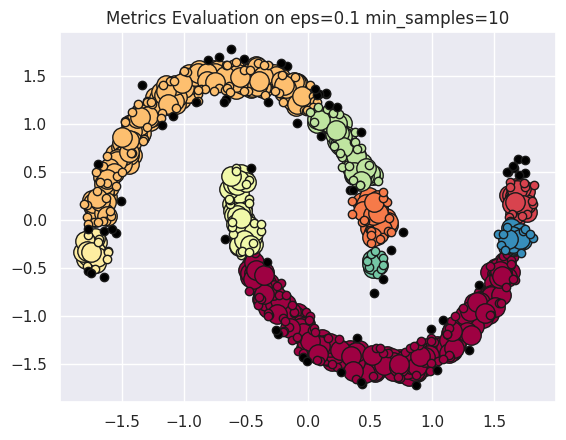



Cluster & Noise on eps=0.1 min_samples=20
-------------------------------------
Estimated number of clusters: 6
Estimated number of noise points: 844
-------------------------------------

Metrics Evaluation on eps=0.1 min_samples=20
-------------------------------------
Homogeneity: 0.157
Completeness: 0.153
V-measure: 0.155
Adjusted Rand Index: 0.010
Adjusted Mutual Information: 0.152
Silhouette Coefficient: -0.409
-------------------------------------



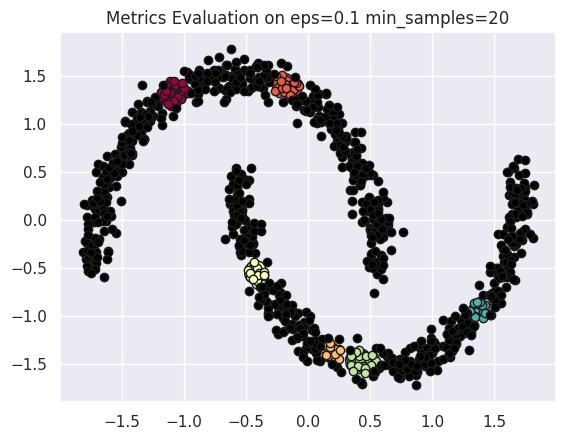



Cluster & Noise on eps=0.3 min_samples=3
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=3
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



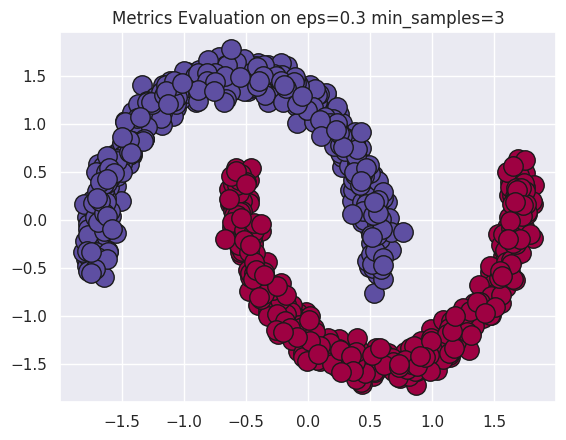



Cluster & Noise on eps=0.3 min_samples=10
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=10
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



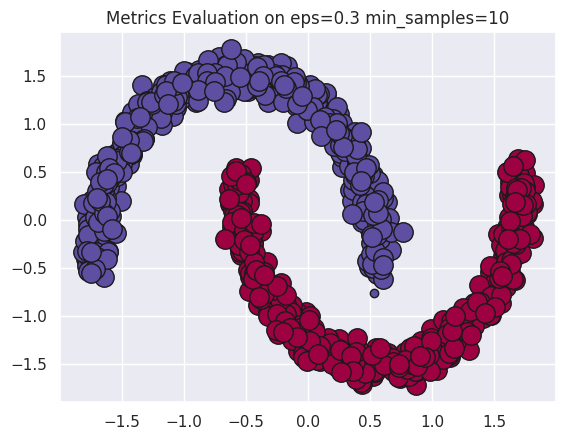



Cluster & Noise on eps=0.3 min_samples=20
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.3 min_samples=20
-------------------------------------
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392
-------------------------------------



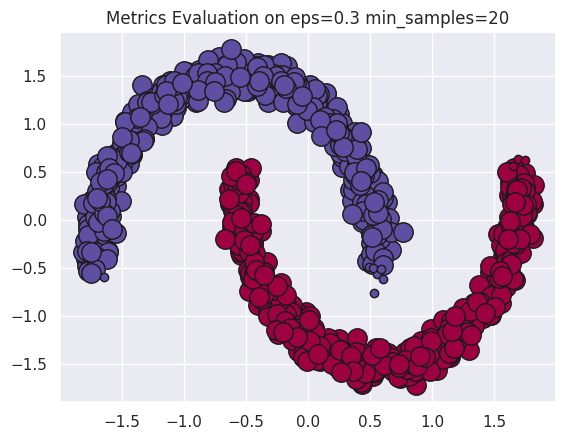



Cluster & Noise on eps=0.5 min_samples=3
-------------------------------------
Estimated number of clusters: 1
Estimated number of noise points: 0
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



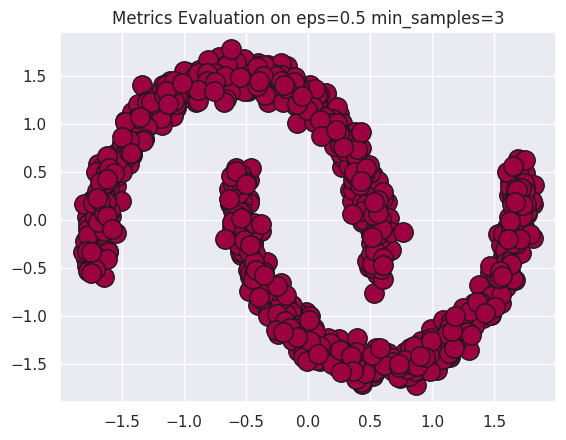



Cluster & Noise on eps=0.5 min_samples=10
-------------------------------------
Estimated number of clusters: 1
Estimated number of noise points: 0
-------------------------------------

Skipping metrics evaluation because 1 or fewer clusters were found.



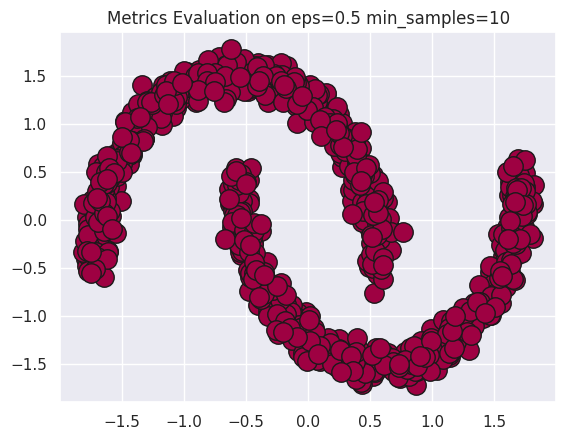



Cluster & Noise on eps=0.5 min_samples=20
-------------------------------------
Estimated number of clusters: 2
Estimated number of noise points: 0
-------------------------------------

Metrics Evaluation on eps=0.5 min_samples=20
-------------------------------------
Homogeneity: 0.990
Completeness: 0.990
V-measure: 0.990
Adjusted Rand Index: 0.996
Adjusted Mutual Information: 0.990
Silhouette Coefficient: 0.393
-------------------------------------



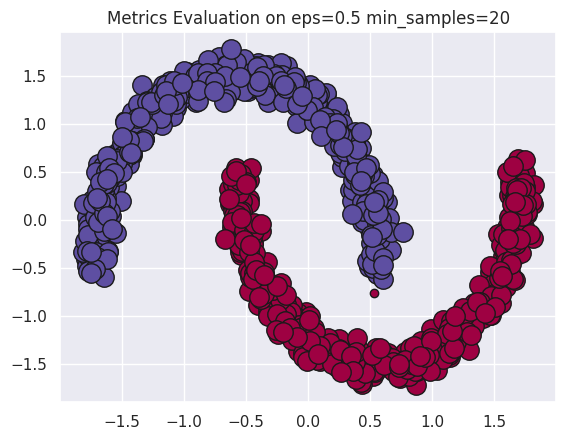

In [ ]:
eps_exp = [0.05, 0.1, 0.3, 0.5]
min_samples_exp = [3, 10, 20]

for eps in eps_exp:
  for min_samples in min_samples_exp:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    cluster_noise_count(db, eps, min_samples)

    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters_ > 1:
        metrics_evaluation(db, eps, min_samples)
    else:
        print("Skipping metrics evaluation because 1 or fewer clusters were found.\n")

    dbscan_visualization(db, eps, min_samples)